# Report 4 MTH 448
## By: Kartik Garg 
## Person Number:50200426 
### Date: 05-13-2018
# College students survey of food and cooking preferences.

## I. Introduction

This dataset includes a survey from 126 students of Mercyhurst University. The dataset has information on GPA, food choices, nutrition, preferences, childhood favorites, and other such information from college students. This dataset can be usefull in various ways.(1.)

In my research I used this dataset to find answers to various different questions such as gender comparison of GPA vs Weight, weight vs cooking preferences and eating changes in college life of a student. I have used a combination of pandas dataframe to read amd modify the data; database analysis techniques to achieve distributions; networkx and community packages to study using graphs and networks.

Also, I have used some basic concepts of Natural Language Toolkit(nltk) in order to assess some open ended questions in the survey.


## II. Extracting and cleaning the database using pandas dataframe.
####  First we extract and clean the database to work using pandas dataframe.

In [1]:
%pylab inline
import pandas # pandas is a software library for data manipulation
import numpy as np #numpy library
import matplotlib.pyplot as plt #to plot graphs
import networkx as nx #to crate graphs and networks
import community #community database
import nltk #natural language toolkit
from nltk import word_tokenize
#nltk.download('stopwords') # use to download stopwords
from nltk.corpus import stopwords #import stopwords
import string #string package

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pandas.read_csv('food_coded.csv',low_memory=False) # reads the file 'food-coded.csv'
df.head(20) # prints 10 columns of the file.

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125


### Priting all the colums and the unique values in each column

In [3]:
for col in df:
    print(col,df[col].unique())

GPA ['2.4' '3.654' '3.3' '3.2' '3.5' '2.25' '3.8' '3.904' '3.4' '3.6' '3.1' nan
 '4' '2.2' '3.87' '3.7' '3.9' '2.8' '3' '3.65' '3.89' '2.9' '3.605' '3.83'
 '3.292' '3.35' 'Personal ' '2.6' '3.67' '3.73' '3.79' '2.71' '3.68' '3.75'
 '3.92' 'Unknown' '3.77' '3.63' '3.882']
Gender [2 1]
breakfast [1 2]
calories_chicken [430 610 720 265]
calories_day [ nan   3.   4.   2.]
calories_scone [ 315.  420.  980.   nan]
coffee [1 2]
comfort_food ['none' 'chocolate, chips, ice cream' 'frozen yogurt, pizza, fast food'
 'Pizza, Mac and cheese, ice cream' 'Ice cream, chocolate, chips '
 'Candy, brownies and soda.' 'Chocolate, ice cream, french fries, pretzels'
 'Ice cream, cheeseburgers, chips.' 'Donuts, ice cream, chips'
 'Mac and cheese, chocolate, and pasta '
 'Pasta, grandma homemade chocolate cake anything homemade '
 'chocolate, pasta, soup, chips, popcorn' 'Cookies, popcorn, and chips'
 'ice cream, cake, chocolate'
 'Pizza, fruit, spaghetti, chicken and Potatoes  '
 'cookies, donuts, candy bars

### Cleaning and removing the rows containing no response in the GPA column.

In [4]:
df[['GPA','weight']] = df[['GPA','weight']].apply(pandas.to_numeric, errors='coerce') #cleaning the GPA and weight column to remove strings
df1 = df[np.isfinite(df['GPA'])] # only consider rows with finite GPA
df1 #contains rows with finite GPA

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,NaN
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,NaN
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0
5,2.250,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190.0
6,3.800,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180.0
7,3.300,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137.0
8,3.300,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180.0
9,3.300,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125.0


## III. Creating distributions based on GPA, weight and gender

Creating list of GPA, weight and gender

In [5]:
GPA=df1['GPA'].tolist()# list of GPA's
weight=df1['weight'].tolist()# list of weight
Gender=df1['Gender'].tolist()# list of gender

### Number of male vs female in the survey

In [6]:
female=[] #female are coded as 1 
male=[] #male are coded as 2
for i in range(len(Gender)):
    if (Gender[i]==1): female.append('1')
    else: male.append('2')

#### Here we create the actual pie chart of the gender distribution

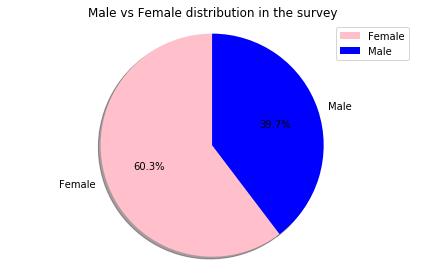

In [7]:
labels = ['Female', 'Male']
sizes = [73, 48]
colors = ['pink', 'blue']
explode = [0,0]
plt.pie(sizes, labels=labels,colors = colors, autopct = '%1.1f%%', shadow = True,startangle=90)
plt.legend(labels)
plt.axis('equal')
plt.title('Male vs Female distribution in the survey')
plt.tight_layout()
plt.show()# function to show the plot

Hence we can see from the above distribution that there are more number of females than the number of males in the survey.(5.)

### Gender distribution of weight vs GPA.

In [8]:
GPA_female=[] #list of female GPA's
GPA_male=[]#list of male GPA's
for i in range(len(Gender)):
    if (Gender[i]==1):
        GPA_female.append(float(GPA[i]))
    elif(Gender[i]==2):
         GPA_male.append(float(GPA[i]))
weight_female=[] #list of female weights
weight_male=[] #list of male weights
for i in range(len(Gender)):
    if (Gender[i]==1):
        weight_female.append(float(weight[i]))
    elif(Gender[i]==2):
         weight_male.append(float(weight[i]))

#### Average male vs female GPA's

In [9]:
# Function to get average of a list
def Average(lst):
    return sum(lst) / len(lst)
 
avg_male_GPA = Average(GPA_male)
avg_female_GPA =Average(GPA_female)
s = 'Average male GPA: ' + format(avg_male_GPA) + '\nAverage female GPA: ' + format(avg_female_GPA)

print(s)

Average male GPA: 3.388375
Average female GPA: 3.4385616438356164


#### Creating a bar graph to visualize the average distribution of male vs female GPA's

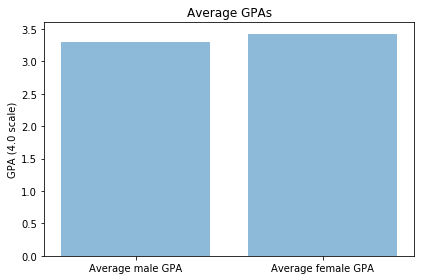

In [10]:
objects = ('Average male GPA', 'Average female GPA')  # data from above result
y_pos = np.arange(len(objects))
performance = [3.3, 3.43] # data from above result
# PLot a graph to display male vs feamle GPA's
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)# naming the x axis
plt.ylabel('GPA (4.0 scale)')# naming the y axis
plt.title('Average GPAs')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.show()# function to show the plot

So, we deduce that from the survey that the average GPA of females were more than that of male students.

### GPA vs weight distriubtion graph

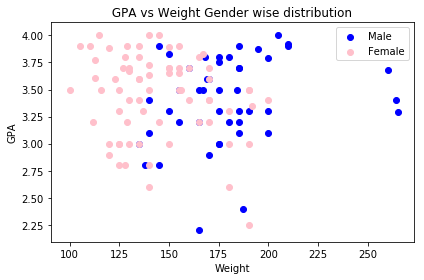

In [48]:
plt.scatter(weight_male, GPA_male, label= "Male", color= "blue")
plt.scatter(weight_female, GPA_female, label= "Female", color= "pink")
plt.xlabel('Weight')# naming the x axis
plt.ylabel('GPA')# naming the y axis
plt.title(' GPA vs Weight Gender wise distribution ')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.legend()
plt.show()# function to show the plot

The plot gives us a good visual of the GPA and weight distribution of male vs female students

#### All the deatils of person with highest weight in the survey

In [12]:
max_gpa = df['weight'].idxmax()# index of row in which the weight is the highest
df.iloc[max_gpa] # get data in row for the highest weight

GPA                                                                         3.292
Gender                                                                          2
breakfast                                                                       1
calories_chicken                                                              610
calories_day                                                                  NaN
calories_scone                                                                980
coffee                                                                          2
comfort_food                           fries, chips, fried chicken, pizza, grapes
comfort_food_reasons                                             Boredom, sadness
comfort_food_reasons_coded                                                      2
cook                                                                            4
comfort_food_reasons_coded.1                                                    2
cuisine         

### Eating habits vs weight distribution of students.

Eating changes after entering college vs weight distribution of students.(2)

In [13]:
g = df.groupby('eating_changes_coded1') # contains eating changes
g.agg({'weight':'median'}) # aggregating eating changes with median weight of students

,weight
eating_changes_coded1,
1,187.0
2,165.0
3,150.0
4,180.0
5,166.0
6,135.0
7,145.0
8,150.0
9,140.0


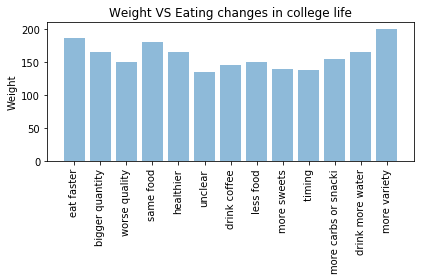

In [14]:
objects = ('eat faster','bigger quantity','worse quality','same food','healthier','unclear','drink coffee' ,'less food','more sweets',' timing' ,'more carbs or snacking','drink more water','more variety') # from the survey (in .docx file)
y_pos = np.arange(len(objects)) # to display on y axis
weight= [187.0,165.0,150.0,180.0,166.0,135.0,145.0,150.0,140.0,138.0,155.0,165.0,200.0] # copied from above results 

plt.bar(y_pos, weight, align='center', alpha=0.5)
plt.xticks((y_pos), [obj[0:20] for obj in objects],rotation=90)# naming the x axis
#plt.xticks(y_pos, objects)
plt.ylabel('Weight')# naming the y axis
plt.title('Weight VS Eating changes in college life')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.show()

We cannot deduce much from the above graph as it is almost equally distributed, although we can see that the students who eat more variety of food had the maximum weight.

#### Frequency of eating outside vs weight distribution of students.

In [15]:
g = df.groupby('eating_out')# contains eating outside data
g.agg({'weight':'median'}) # aggregating eating outside with median weight of students

,weight
eating_out,
1,145.0
2,155.0
3,140.0
4,170.0
5,177.5


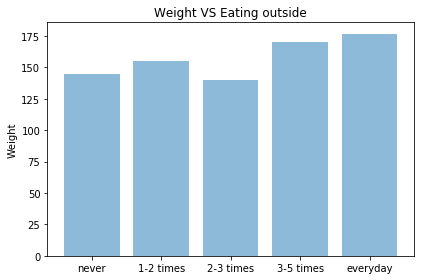

In [16]:
objects = ('never','1-2 times','2-3 times','3-5 times','everyday') # from the survey (in .docx file)
y_pos = np.arange(len(objects)) # to display on y axis
weight= [145,155,140,170,177] # copied from above results 
 
plt.bar(y_pos, weight, align='center', alpha=0.5) # plots bargraph
plt.xticks(y_pos, objects)# naming the x axis
plt.ylabel('Weight')# naming the y axis
plt.title('Weight VS Eating outside')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.show()

This plot gives us a good view of increasing weight with outside eating habits of a student. The students who eat outside had the maximum median weight. However, students who eat food outside 2-3 times had the median weight similar to the students who never eat food outside.

#### Frequency of a fruit in a day vs weight distribution of students

In [17]:
g = df.groupby('fruit_day')# contains eating fruit in a day data
g.agg({'weight':'median'})# aggregating eating fruit in a day with median weight of students

,weight
fruit_day,
1,190.0
2,170.0
3,160.0
4,169.5
5,145.0


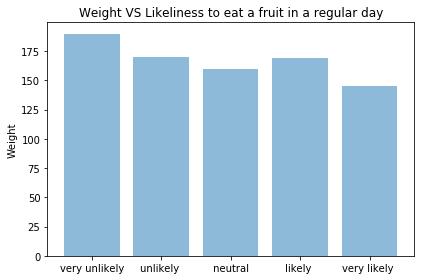

In [18]:
objects = ('very unlikely','unlikely ',' neutral ','likely ','very likely ')# from the survey (in .docx file)
y_pos = np.arange(len(objects))# to display on y axis
weight= [190, 170, 160, 169, 145]# copied from above results 
 
plt.bar(y_pos, weight, align='center', alpha=0.5)
plt.xticks(y_pos, objects)# naming the x axis
plt.ylabel('Weight')# naming the y axis
plt.title('Weight VS Likeliness to eat a fruit in a regular day')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.show()

This plot gives also gives us a good understanding of how fruits help to reduce the obesity among students. Students who are more likely to eat a fruit in a day were less obese than the students who were unlikely to eat any fruit in a day.

## IV. Visualizing the data using networkx and community distribution graphs.(2)

Cleaning the data 

In [38]:
df2 = df[np.isfinite(df['weight'])] # dataframe to containe finite weight values
df3 = df2[np.isfinite(df['fruit_day'])] # dataframe to containe finite fruit_day values
newdf = df3[['weight', 'fruit_day']].copy() #new dataframe to containe finite values of df2 and df3.
newdf[['weight', 'fruit_day']] = newdf[['weight', 'fruit_day']].apply(pandas.to_numeric, errors='coerce') #if not in numeric form convert to numeric
np.savetxt('x.txt', newdf.values, fmt='%d', delimiter="\t") # save the values in a .txt file to create graphs

C:\Users\gargk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Creating a connected graph of weight and number of times student eats a fruit in a day using the networkx package

Name: 
Type: Graph
Number of nodes: 49
Number of edges: 74
Average degree:   3.0204


C:\Users\gargk\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


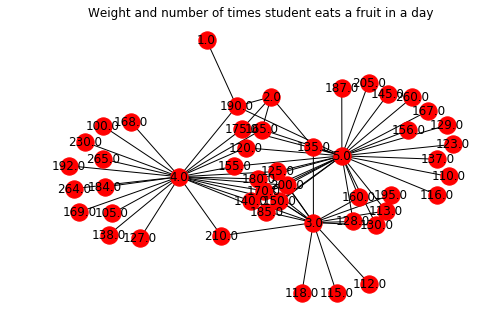

In [32]:
g = nx.read_edgelist("x.txt",create_using=nx.Graph(), nodetype = float) # reades edelist from the .txt file we created above
n=list(g.nodes()) # list of all the nodes
#print(n)
print(nx.info(g)) # print all the information of graph.
nx.draw(g,with_labels=True) # draw the graphs
plt.title('Weight and number of times student eats a fruit in a day')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.show()

### Using community package to create a community graph(2)

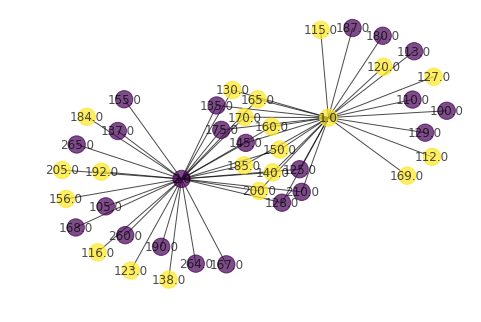

In [57]:
partition = community.best_partition(g)# this finds the clusters using one algorithm
color_vec = list(partition.values())# we need a vector with the cluster ids to show clusters using color in a plot
#plt.title('Weight and number of times student eats a fruit in a day')# giving a title to my graph
nx.draw(g,pos=nx.spring_layout(g),node_color=color_vec,font_size=12,alpha=0.7,with_labels=True )

The above connected graoh gives us a better understanding of weight distribution of a student and the likeliness of student having a fruit in a day.

Here likeliness rating according to the data is:

1 - very unlikely 

2 - unlikely 

3 - neutral 

4 - likely 

5 - very likely 


So, there is only 1 student who's response is 1, the group 4 and 5 has maximum students, which tells that students are more likely to have fruit in a day, as well as it helps to keep obesity at bay.

### Creating a connected graph of weight and the response of student to the picture of the drink using the networkx package

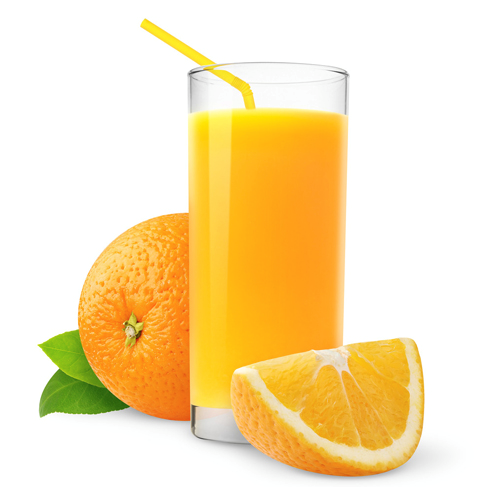

In [22]:
from IPython.display import Image
Image("image.png")

In the survey this question was asked (1)

Which picture do you associate with the word “drink”?

1 – orange juice

2 – soda 

### We will study the response of this question in realtion to weight of student

In [23]:
df2 = df1[np.isfinite(df1['drink'])]# dataframe to containe finite drink values
df3 = df2[np.isfinite(df1['weight'])]# dataframe to containe finite weight values
newdf = df3[['drink', 'weight']].copy()#new dataframe to containe finite values of df2 and df3.
newdf[['drink', 'weight']] = newdf[['drink', 'weight']].apply(pandas.to_numeric, errors='coerce')#if not in numeric form convert to numeric
np.savetxt('x1.txt', newdf.values, fmt='%d', delimiter="\t")# save the values in a .txt file to create graphs

C:\Users\gargk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Name: 
Type: Graph
Number of nodes: 43
Number of edges: 55
Average degree:   2.5581


C:\Users\gargk\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


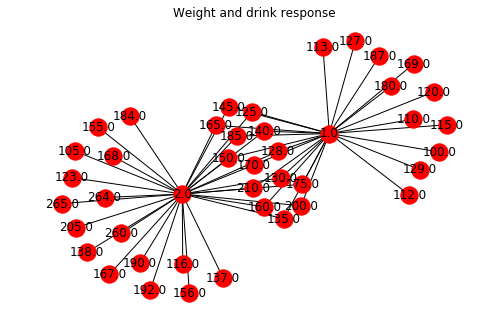

In [39]:
g = nx.read_edgelist("x1.txt",create_using=nx.Graph(), nodetype = float) # reades edelist from the .txt file we created above
n=list(g.nodes()) # list of all the nodes
#print(n)
print(nx.info(g)) # print all the information of graph.
nx.draw(g,with_labels=True) # draw the graphs
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.title('Weight and drink response')# giving a title to my graph
plt.show()

From the graph we can see that the response was equally distributed. However, the weight of students who responded "Orange Juice" tends to lower side than of students who responded "Soda".


## V. Natural Language Toolkit to analyze some open ended questions in the survey.(3)

### 1.Analyzing the response to current diet question on the survey.

Converting .csv to .txt to easily analyze the data

In [25]:
ndf=df['diet_current'].copy() # new dataframe to copy the contents of diet_current column.
ndf.to_csv('current_diet.txt', index=False, sep=' ', header=None) # converting csv to txt

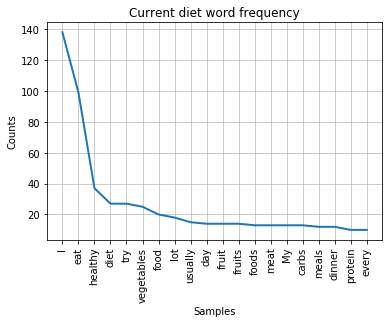

In [44]:
stop = stopwords.words('english') + list(string.punctuation) # stopwords + string of punctuations
#stopwords are unwanted words in database analysis.
with open("current_diet.txt", 'r') as f, open('current_diet_updated.txt', 'w') as fo: #opening the text file and creating a new text file to remove unwanted modifiers
    for line in f:
        fo.write(line.replace('"', '').replace("'", "").replace(".", "").replace("(","").replace(")",""))  # removing ",',(,) in the new text file
text = open("current_diet_updated.txt").read()# open the text file

tokens = [t for t in text.split()] # creating tokens
clean_tokens = tokens[:] # cleaning the tokens and saving in new variable
for token in tokens:
    if token in stop:
        clean_tokens.remove(token) #removing stopwords from our analysis
freq = nltk.FreqDist(clean_tokens) #frequency of words 
plt.title('Current diet word frequency')# giving a title to my graph
freq.plot(20,cumulative=False)


The graph is a good display of frequency of words, but there are some unwanted words. So, we will try to remove them to build a better understanding.

### Adding to the list of stopwords to make our analysis more comprehensible.

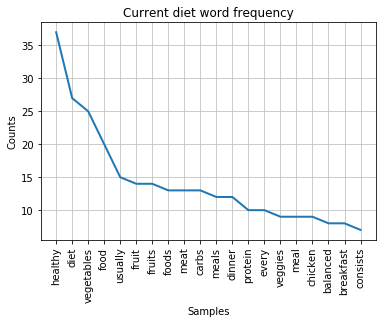

In [45]:
newStopWords = ['I','eat','lot','My','day','also','like','try','well'] # some more unwanted words from previous analysis
stop.extend(newStopWords)#adding the words to list of stopwords
text = open("current_diet_updated.txt").read()# open the text file
tokens = [t for t in text.split()] # creating tokens
clean_tokens = tokens[:] # cleaning the tokens and saving in new variable
for token in tokens:
    if token in stop:
        clean_tokens.remove(token) #removing stopwords from our analysis
freq = nltk.FreqDist(clean_tokens) #frequency of words 
plt.title('Current diet word frequency')# giving a title to my graph
freq.plot(20,cumulative=False)

Now this graph is better than the provios one.

From the above graph we can see that students are using "healhty" word maximum number of times. Which tells us that students are trying to eat healthy food in the current diet. 

Also, some more noteworthty words after that are "vegetables", "fruit", "meat". So, we can deduce that in the current diet students try to eat these foods more.

### 2. Analyzing the response to comfort foods and reasons for comfort food question on the survey.

Now we know we can add some words to the stop words from previous survey, so we will integrate the whole process in one.

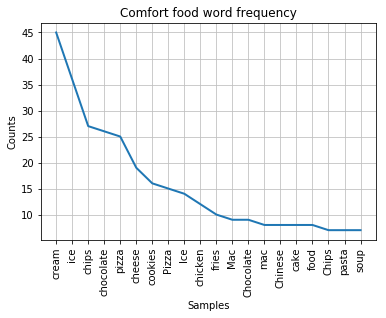

In [46]:
ndf=df['comfort_food'].copy() # new dataframe to copy the contents of diet_current column.
ndf.to_csv('comfort_f.txt', index=False, sep=' ', header=None) # converting csv to txt
stop = stopwords.words('english') + list(string.punctuation) # stopwords + string of punctuations
#stopwords are unwanted words in database analysis.
newStopWords = ['I','eat','lot','My','day','also','like','try','well'] # some more unwanted words from previous analysis
stop.extend(newStopWords)#adding the words to list of stopwords
with open("comfort_f.txt", 'r') as f, open('comfort_f_updated.txt', 'w') as fo: #opening the text file and creating a new text file to remove unwanted modifiers
    for line in f:
        fo.write(line.replace('"', '').replace("'", "").replace(".", "").replace("(","").replace(")","").replace(",",""))  # removing ",',(,) in the new text file
text = open("comfort_f_updated.txt").read()# open the text file
tokens = [t for t in text.split()] # creating tokens
clean_tokens = tokens[:] # cleaning the tokens and saving in new variable
for token in tokens:
    if token in stop:
        clean_tokens.remove(token) #removing stopwords from our analysis
freq = nltk.FreqDist(clean_tokens) #frequency of words 
plt.title('Comfort food word frequency')# giving a title to my graph
freq.plot(20,cumulative=False)

So accroding to the graph, top comfort foods are: "cream", "ice", "chocolate", "pizza", "cheese" ,"cookies" ,"chicken" ,"fries".
### Now we will also try to determine the resons for these comfort foods:

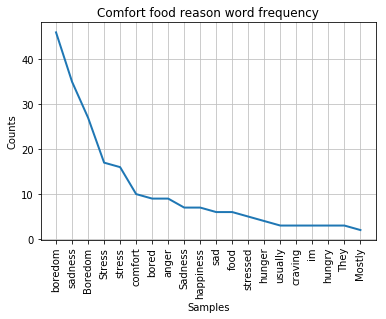

In [47]:
ndf=df['comfort_food_reasons'].copy() # new dataframe to copy the contents of diet_current column.
ndf.to_csv('comfort_food_r.txt', index=False, sep=' ', header=None) # converting csv to txt
stop = stopwords.words('english') + list(string.punctuation) # stopwords + string of punctuations
#stopwords are unwanted words in database analysis.
newStopWords = ['I','eat','lot','My','day','also','like','try','well'] # some more unwanted words from previous analysis
stop.extend(newStopWords)#adding the words to list of stopwords
with open("comfort_food_r.txt", 'r') as f, open('comfort_food_r_updated.txt', 'w') as fo: #opening the text file and creating a new text file to remove unwanted modifiers
    for line in f:
        fo.write(line.replace('"', '').replace("'", "").replace(".", "").replace("(","").replace(")","").replace(",",""))  # removing ",',(,) in the new text file
text = open("comfort_food_r_updated.txt").read()# open the text file
tokens = [t for t in text.split()] # creating tokens
clean_tokens = tokens[:] # cleaning the tokens and saving in new variable
for token in tokens:
    if token in stop:
        clean_tokens.remove(token) #removing stopwords from our analysis
freq = nltk.FreqDist(clean_tokens) #frequency of words 
plt.title('Comfort food reason word frequency')# giving a title to my graph
freq.plot(20,cumulative=False)

So, the top reasons for comfort foods are: "boredom", "sadness", "stress", "comfort", "anger" and "hunger"

## VI. Conclusion:

There were various outputs from our research in this database.
1. GPA of females were more than that of male students.
2. The students who eat outside had the maximum median weight.
3. Students who are more likely to eat a fruit in a day were less obese than the students who were unlikely to eat any fruit in a day.
4. The weight of students who responded "Orange Juice" tends to lower side than of students who responded "Soda".
5. Students are trying to eat healthy food in the current diet.
6. Top comfort foods are: "cream", "ice", "chocolate", "pizza", "cheese" ,"cookies" ,"chicken" ,"fries".
7. Top reasons for comfort foods are: "boredom", "sadness", "stress", "comfort", "anger" and "hunger".

Therefore, we can see from the results that there is an obvious connection between eating habits on a daily basis and weight of the students

## VII. CODE

Populating the interactive namespace from numpy and matplotlib
GPA ['2.4' '3.654' '3.3' '3.2' '3.5' '2.25' '3.8' '3.904' '3.4' '3.6' '3.1' nan
 '4' '2.2' '3.87' '3.7' '3.9' '2.8' '3' '3.65' '3.89' '2.9' '3.605' '3.83'
 '3.292' '3.35' 'Personal ' '2.6' '3.67' '3.73' '3.79' '2.71' '3.68' '3.75'
 '3.92' 'Unknown' '3.77' '3.63' '3.882']
Gender [2 1]
breakfast [1 2]
calories_chicken [430 610 720 265]
calories_day [ nan   3.   4.   2.]
calories_scone [ 315.  420.  980.   nan]
coffee [1 2]
comfort_food ['none' 'chocolate, chips, ice cream' 'frozen yogurt, pizza, fast food'
 'Pizza, Mac and cheese, ice cream' 'Ice cream, chocolate, chips '
 'Candy, brownies and soda.' 'Chocolate, ice cream, french fries, pretzels'
 'Ice cream, cheeseburgers, chips.' 'Donuts, ice cream, chips'
 'Mac and cheese, chocolate, and pasta '
 'Pasta, grandma homemade chocolate cake anything homemade '
 'chocolate, pasta, soup, chips, popcorn' 'Cookies, popcorn, and chips'
 'ice cream, cake, chocolate'
 'Pizza, fruit, s

C:\Users\gargk\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'partition', 'text', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


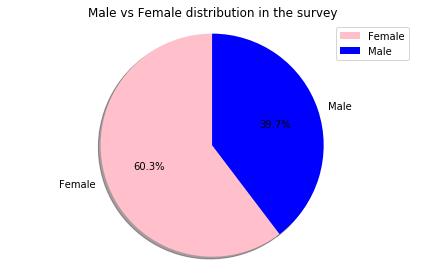

Average male GPA: 3.388375
Average female GPA: 3.4385616438356164


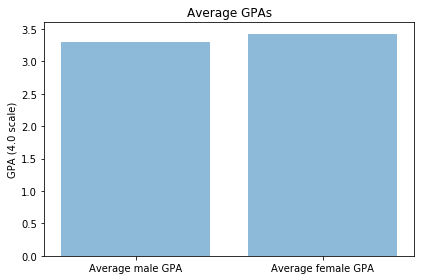

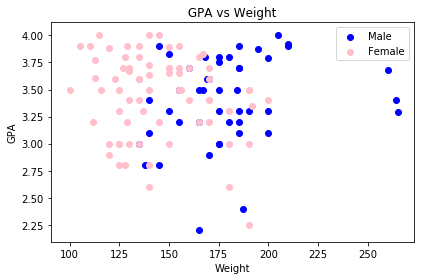

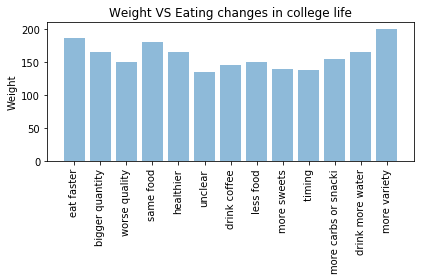

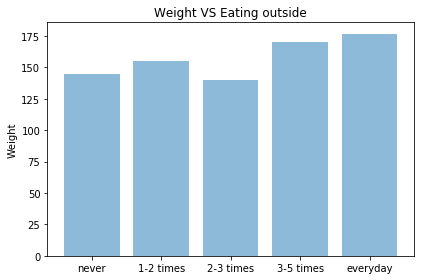

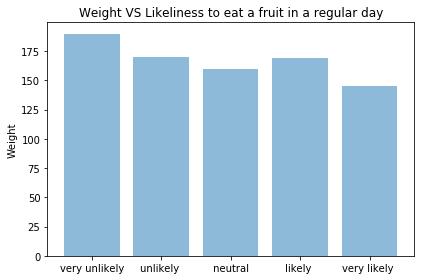

Name: 
Type: Graph
Number of nodes: 49
Number of edges: 74
Average degree:   3.0204


C:\Users\gargk\Anaconda3\lib\site-packages\ipykernel_launcher.py:137: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\gargk\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


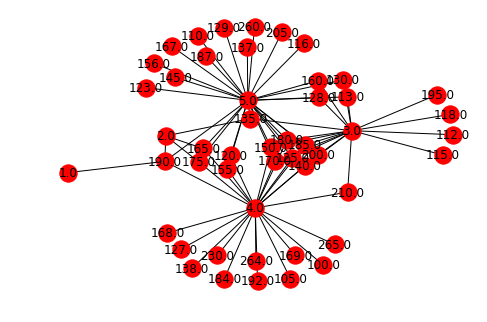

Name: 
Type: Graph
Number of nodes: 49
Number of edges: 74
Average degree:   3.0204


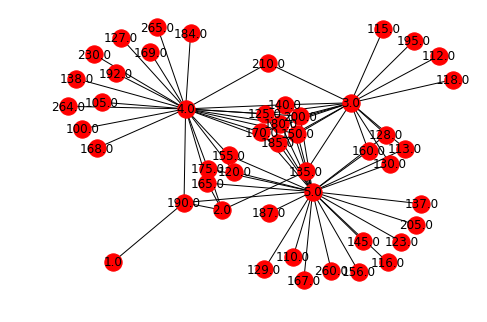

C:\Users\gargk\Anaconda3\lib\site-packages\ipykernel_launcher.py:166: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Name: 
Type: Graph
Number of nodes: 43
Number of edges: 55
Average degree:   2.5581


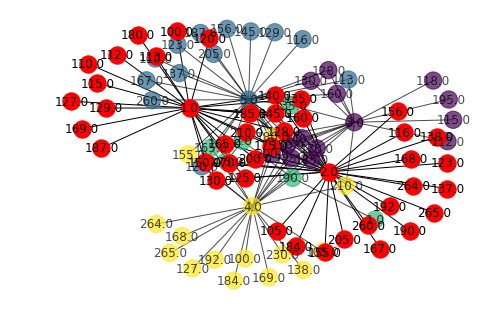

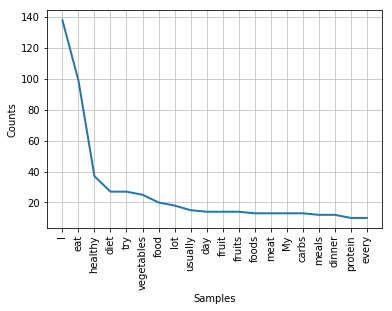

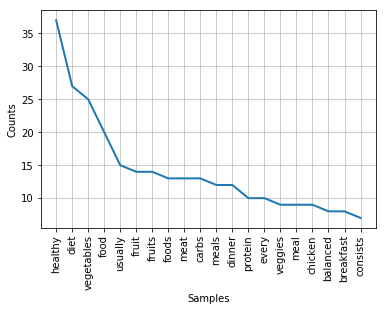

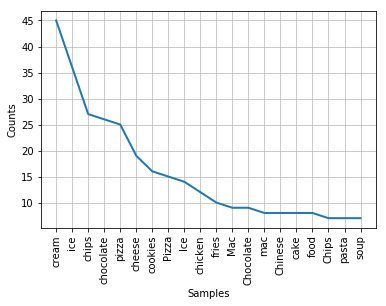

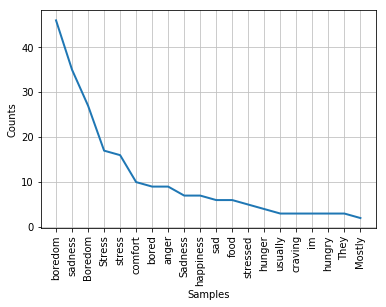

In [30]:
%pylab inline
import pandas # pandas is a software library for data manipulation
import numpy as np #numpy library
import matplotlib.pyplot as plt #to plot graphs
import networkx as nx #to crate graphs and networks
import community #community database
import nltk #natural language toolkit
from nltk import word_tokenize
#nltk.download('stopwords') # use to download stopwords
from nltk.corpus import stopwords #import stopwords
import string 

df = pandas.read_csv('food_coded.csv',low_memory=False) # reads the file 'food-coded.csv'
df.head(20) # prints 10 columns of the file.

for col in df:
    print(col,df[col].unique())
    
df[['GPA','weight']] = df[['GPA','weight']].apply(pandas.to_numeric, errors='coerce') #cleaning the GPA and weight column to remove strings
df1 = df[np.isfinite(df['GPA'])] # only consider rows with finite GPA
df1 #contains rows with finite GPA

GPA=df1['GPA'].tolist()# list of GPA's
weight=df1['weight'].tolist()# list of weight
Gender=df1['Gender'].tolist()# list of gender

female=[] #female are coded as 1 
male=[] #male are coded as 2
for i in range(len(Gender)):
    if (Gender[i]==1): female.append('1')
    else: male.append('2')
        
labels = ['Female', 'Male']
sizes = [73, 48]
colors = ['pink', 'blue']
explode = [0,0]
plt.pie(sizes, labels=labels,colors = colors, autopct = '%1.1f%%', shadow = True,startangle=90)
plt.legend(labels)
plt.axis('equal')
plt.title('Male vs Female distribution in the survey')
plt.tight_layout()
plt.show()# function to show the plot

GPA_female=[] #list of female GPA's
GPA_male=[]#list of male GPA's
for i in range(len(Gender)):
    if (Gender[i]==1):
        GPA_female.append(float(GPA[i]))
    elif(Gender[i]==2):
         GPA_male.append(float(GPA[i]))
weight_female=[] #list of female weights
weight_male=[] #list of male weights
for i in range(len(Gender)):
    if (Gender[i]==1):
        weight_female.append(float(weight[i]))
    elif(Gender[i]==2):
         weight_male.append(float(weight[i]))
            

# Function to get average of a list
def Average(lst):
    return sum(lst) / len(lst)
 
avg_male_GPA = Average(GPA_male)
avg_female_GPA =Average(GPA_female)
s = 'Average male GPA: ' + format(avg_male_GPA) + '\nAverage female GPA: ' + format(avg_female_GPA)

print(s)

objects = ('Average male GPA', 'Average female GPA')  # data from above result
y_pos = np.arange(len(objects))
performance = [3.3, 3.43] # data from above result
# PLot a graph to display male vs feamle GPA's
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)# naming the x axis
plt.ylabel('GPA (4.0 scale)')# naming the y axis
plt.title('Average GPAs')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.show()# function to show the plot

plt.scatter(weight_male, GPA_male, label= "Male", color= "blue")
plt.scatter(weight_female, GPA_female, label= "Female", color= "pink")
plt.xlabel('Weight')# naming the x axis
plt.ylabel('GPA')# naming the y axis
plt.title(' GPA vs Weight ')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.legend()
plt.show()# function to show the plot

max_gpa = df['weight'].idxmax()# index of row in which the weight is the highest
df.iloc[max_gpa] # get data in row for the highest weight

g = df.groupby('eating_changes_coded1') # contains eating changes
g.agg({'weight':'median'}) # aggregating eating changes with median weight of students

objects = ('eat faster','bigger quantity','worse quality','same food','healthier','unclear','drink coffee' ,'less food','more sweets',' timing' ,'more carbs or snacking','drink more water','more variety') # from the survey (in .docx file)
y_pos = np.arange(len(objects)) # to display on y axis
weight= [187.0,165.0,150.0,180.0,166.0,135.0,145.0,150.0,140.0,138.0,155.0,165.0,200.0] # copied from above results 

plt.bar(y_pos, weight, align='center', alpha=0.5)
plt.xticks((y_pos), [obj[0:20] for obj in objects],rotation=90)# naming the x axis
#plt.xticks(y_pos, objects)
plt.ylabel('Weight')# naming the y axis
plt.title('Weight VS Eating changes in college life')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.show()

g = df.groupby('eating_out')# contains eating outside data
g.agg({'weight':'median'}) # aggregating eating outside with median weight of students

objects = ('never','1-2 times','2-3 times','3-5 times','everyday') # from the survey (in .docx file)
y_pos = np.arange(len(objects)) # to display on y axis
weight= [145,155,140,170,177] # copied from above results 
 
plt.bar(y_pos, weight, align='center', alpha=0.5) # plots bargraph
plt.xticks(y_pos, objects)# naming the x axis
plt.ylabel('Weight')# naming the y axis
plt.title('Weight VS Eating outside')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.show()

g = df.groupby('fruit_day')# contains eating fruit in a day data
g.agg({'weight':'median'})# aggregating eating fruit in a day with median weight of students

objects = ('very unlikely','unlikely ',' neutral ','likely ','very likely ')# from the survey (in .docx file)
y_pos = np.arange(len(objects))# to display on y axis
weight= [190, 170, 160, 169, 145]# copied from above results 
 
plt.bar(y_pos, weight, align='center', alpha=0.5)
plt.xticks(y_pos, objects)# naming the x axis
plt.ylabel('Weight')# naming the y axis
plt.title('Weight VS Likeliness to eat a fruit in a regular day')# giving a title to my graph
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.show()

df2 = df[np.isfinite(df['weight'])] # dataframe to containe finite weight values
df3 = df2[np.isfinite(df['fruit_day'])] # dataframe to containe finite fruit_day values
newdf = df3[['weight', 'fruit_day']].copy() #new dataframe to containe finite values of df2 and df3.
newdf[['weight', 'fruit_day']] = newdf[['weight', 'fruit_day']].apply(pandas.to_numeric, errors='coerce') #if not in numeric form convert to numeric
np.savetxt('x.txt', newdf.values, fmt='%d', delimiter="\t") # save the values in a .txt file to create graphs

g = nx.read_edgelist("x.txt",create_using=nx.Graph(), nodetype = float) # reades edelist from the .txt file we created above
n=list(g.nodes()) # list of all the nodes
#print(n)
print(nx.info(g)) # print all the information of graph.
nx.draw(g,with_labels=True) # draw the graphs
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.show()

g = nx.read_edgelist("x.txt",create_using=nx.Graph(), nodetype = float) # reades edelist from the .txt file we created above
n=list(g.nodes()) # list of all the nodes
#print(n)
print(nx.info(g)) # print all the information of graph.
nx.draw(g,with_labels=True) # draw the graphs
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.title('Weight and number of times student eats a fruit in a day')# giving a title to my graph
plt.show()

partition = community.best_partition(g)# this finds the clusters using one algorithm
color_vec = list(partition.values())# we need a vector with the cluster ids to show clusters using color in a plot
nx.draw(g,pos=nx.spring_layout(g),node_color=color_vec,font_size=12,alpha=0.7,with_labels=True )

from IPython.display import Image
Image("image.png")

df2 = df1[np.isfinite(df1['drink'])]# dataframe to containe finite drink values
df3 = df2[np.isfinite(df1['weight'])]# dataframe to containe finite weight values
newdf = df3[['drink', 'weight']].copy()#new dataframe to containe finite values of df2 and df3.
newdf[['drink', 'weight']] = newdf[['drink', 'weight']].apply(pandas.to_numeric, errors='coerce')#if not in numeric form convert to numeric
np.savetxt('x1.txt', newdf.values, fmt='%d', delimiter="\t")# save the values in a .txt file to create graphs

g = nx.read_edgelist("x1.txt",create_using=nx.Graph(), nodetype = float) # reades edelist from the .txt file we created above
n=list(g.nodes()) # list of all the nodes
#print(n)
print(nx.info(g)) # print all the information of graph.
nx.draw(g,with_labels=True) # draw the graphs
plt.tight_layout() #tight_layout adjusts subplot params so that the subplot fits in to the figure area.
plt.title('Weight and drink response')# giving a title to my graph
plt.show()

ndf=df['diet_current'].copy() # new dataframe to copy the contents of diet_current column.
ndf.to_csv('current_diet.txt', index=False, sep=' ', header=None) # converting csv to txt

stop = stopwords.words('english') + list(string.punctuation) # stopwords + string of punctuations
#stopwords are unwanted words in database analysis.
with open("current_diet.txt", 'r') as f, open('current_diet_updated.txt', 'w') as fo: #opening the text file and creating a new text file to remove unwanted modifiers
    for line in f:
        fo.write(line.replace('"', '').replace("'", "").replace(".", "").replace("(","").replace(")",""))  # removing ",',(,) in the new text file
text = open("current_diet_updated.txt").read()# open the text file

tokens = [t for t in text.split()] # creating tokens
clean_tokens = tokens[:] # cleaning the tokens and saving in new variable
for token in tokens:
    if token in stop:
        clean_tokens.remove(token) #removing stopwords from our analysis
freq = nltk.FreqDist(clean_tokens) #frequency of words 
plt.title('Current diet word frequency')# giving a title to my graph
freq.plot(20,cumulative=False)

newStopWords = ['I','eat','lot','My','day','also','like','try','well'] # some more unwanted words from previous analysis
stop.extend(newStopWords)#adding the words to list of stopwords
text = open("current_diet_updated.txt").read()# open the text file
tokens = [t for t in text.split()] # creating tokens
clean_tokens = tokens[:] # cleaning the tokens and saving in new variable
for token in tokens:
    if token in stop:
        clean_tokens.remove(token) #removing stopwords from our analysis
freq = nltk.FreqDist(clean_tokens) #frequency of words 
plt.title('Current diet word frequency')# giving a title to my graph
freq.plot(20,cumulative=False)

ndf=df['comfort_food'].copy() # new dataframe to copy the contents of diet_current column.
ndf.to_csv('comfort_f.txt', index=False, sep=' ', header=None) # converting csv to txt
stop = stopwords.words('english') + list(string.punctuation) # stopwords + string of punctuations
#stopwords are unwanted words in database analysis.
newStopWords = ['I','eat','lot','My','day','also','like','try','well'] # some more unwanted words from previous analysis
stop.extend(newStopWords)#adding the words to list of stopwords
with open("comfort_f.txt", 'r') as f, open('comfort_f_updated.txt', 'w') as fo: #opening the text file and creating a new text file to remove unwanted modifiers
    for line in f:
        fo.write(line.replace('"', '').replace("'", "").replace(".", "").replace("(","").replace(")","").replace(",",""))  # removing ",',(,) in the new text file
text = open("comfort_f_updated.txt").read()# open the text file
tokens = [t for t in text.split()] # creating tokens
clean_tokens = tokens[:] # cleaning the tokens and saving in new variable
for token in tokens:
    if token in stop:
        clean_tokens.remove(token) #removing stopwords from our analysis
freq = nltk.FreqDist(clean_tokens) #frequency of words 
plt.title('Comfort food word frequency')# giving a title to my graph
freq.plot(20,cumulative=False)

ndf=df['comfort_food_reasons'].copy() # new dataframe to copy the contents of diet_current column.
ndf.to_csv('comfort_food_r.txt', index=False, sep=' ', header=None) # converting csv to txt
stop = stopwords.words('english') + list(string.punctuation) # stopwords + string of punctuations
#stopwords are unwanted words in database analysis.
newStopWords = ['I','eat','lot','My','day','also','like','try','well'] # some more unwanted words from previous analysis
stop.extend(newStopWords)#adding the words to list of stopwords
with open("comfort_food_r.txt", 'r') as f, open('comfort_food_r_updated.txt', 'w') as fo: #opening the text file and creating a new text file to remove unwanted modifiers
    for line in f:
        fo.write(line.replace('"', '').replace("'", "").replace(".", "").replace("(","").replace(")","").replace(",",""))  # removing ",',(,) in the new text file
text = open("comfort_food_r_updated.txt").read()# open the text file
tokens = [t for t in text.split()] # creating tokens
clean_tokens = tokens[:] # cleaning the tokens and saving in new variable
for token in tokens:
    if token in stop:
        clean_tokens.remove(token) #removing stopwords from our analysis
freq = nltk.FreqDist(clean_tokens) #frequency of words 
plt.title('Comfort food reason word frequency')# giving a title to my graph
freq.plot(20,cumulative=False)

## VIII. REFERENCES:
1. https://www.kaggle.com/borapajo/food-choices
2. http://www.acsu.buffalo.edu/~danet/Sp18/MTH448/
3. https://www.nltk.org/
4. https://likegeeks.com/nlp-tutorial-using-python-nltk/
5. https://pythonspot.com/matplotlib-pie-chart/